In [20]:
#importing required libraries
import numpy as np
import pandas as pd
from sklearn import datasets
# for data visualization
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
# for data transformation
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from scipy import stats
#for model building
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
# Regression Models
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor

# Evaluation Metrics
from sklearn.metrics import mean_squared_error, r2_score

# Model Selection
from sklearn.model_selection import train_test_split

In [5]:
df = pd.read_csv('/content/tracks.csv', header = 0, engine='python')

In [6]:

df.shape

(29169, 20)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29169 entries, 0 to 29168
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                29169 non-null  object 
 1   name              29169 non-null  object 
 2   popularity        29169 non-null  int64  
 3   duration_ms       29169 non-null  int64  
 4   explicit          29169 non-null  int64  
 5   artists           29169 non-null  object 
 6   id_artists        29169 non-null  object 
 7   release_date      29169 non-null  object 
 8   danceability      29169 non-null  float64
 9   energy            29169 non-null  float64
 10  key               29169 non-null  int64  
 11  loudness          29169 non-null  float64
 12  mode              29169 non-null  int64  
 13  speechiness       29169 non-null  float64
 14  acousticness      29169 non-null  float64
 15  instrumentalness  29169 non-null  float64
 16  liveness          29169 non-null  float6

In [8]:

df.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3.0
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1.0
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5.0
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3.0
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4.0


In [9]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
popularity,29169.0,3.927869,7.733329,0.0,0.000000,0.0000,5.000,69.000
duration_ms,29169.0,208339.258699,150305.487655,3344.0,154733.000000,182035.0000,205624.000,3569933.000
explicit,29169.0,0.002571,0.050643,0.0,0.000000,0.0000,0.000,1.000
danceability,29169.0,0.520769,0.174518,0.0,0.390000,0.5390,0.665,0.957
energy,29169.0,0.269702,0.169341,0.0,0.150000,0.2400,0.351,1.000
key,29169.0,5.109603,3.461114,0.0,2.000000,5.0000,8.000,11.000
loudness,29169.0,-15.031173,5.476437,-60.0,-18.566000,-14.3190,-11.055,3.855
mode,29169.0,0.709246,0.454118,0.0,0.000000,1.0000,1.000,1.000
speechiness,29169.0,0.182781,0.288367,0.0,0.040600,0.0544,0.120,0.970
acousticness,29169.0,0.874995,0.196268,0.0,0.854000,0.9630,0.990,0.996


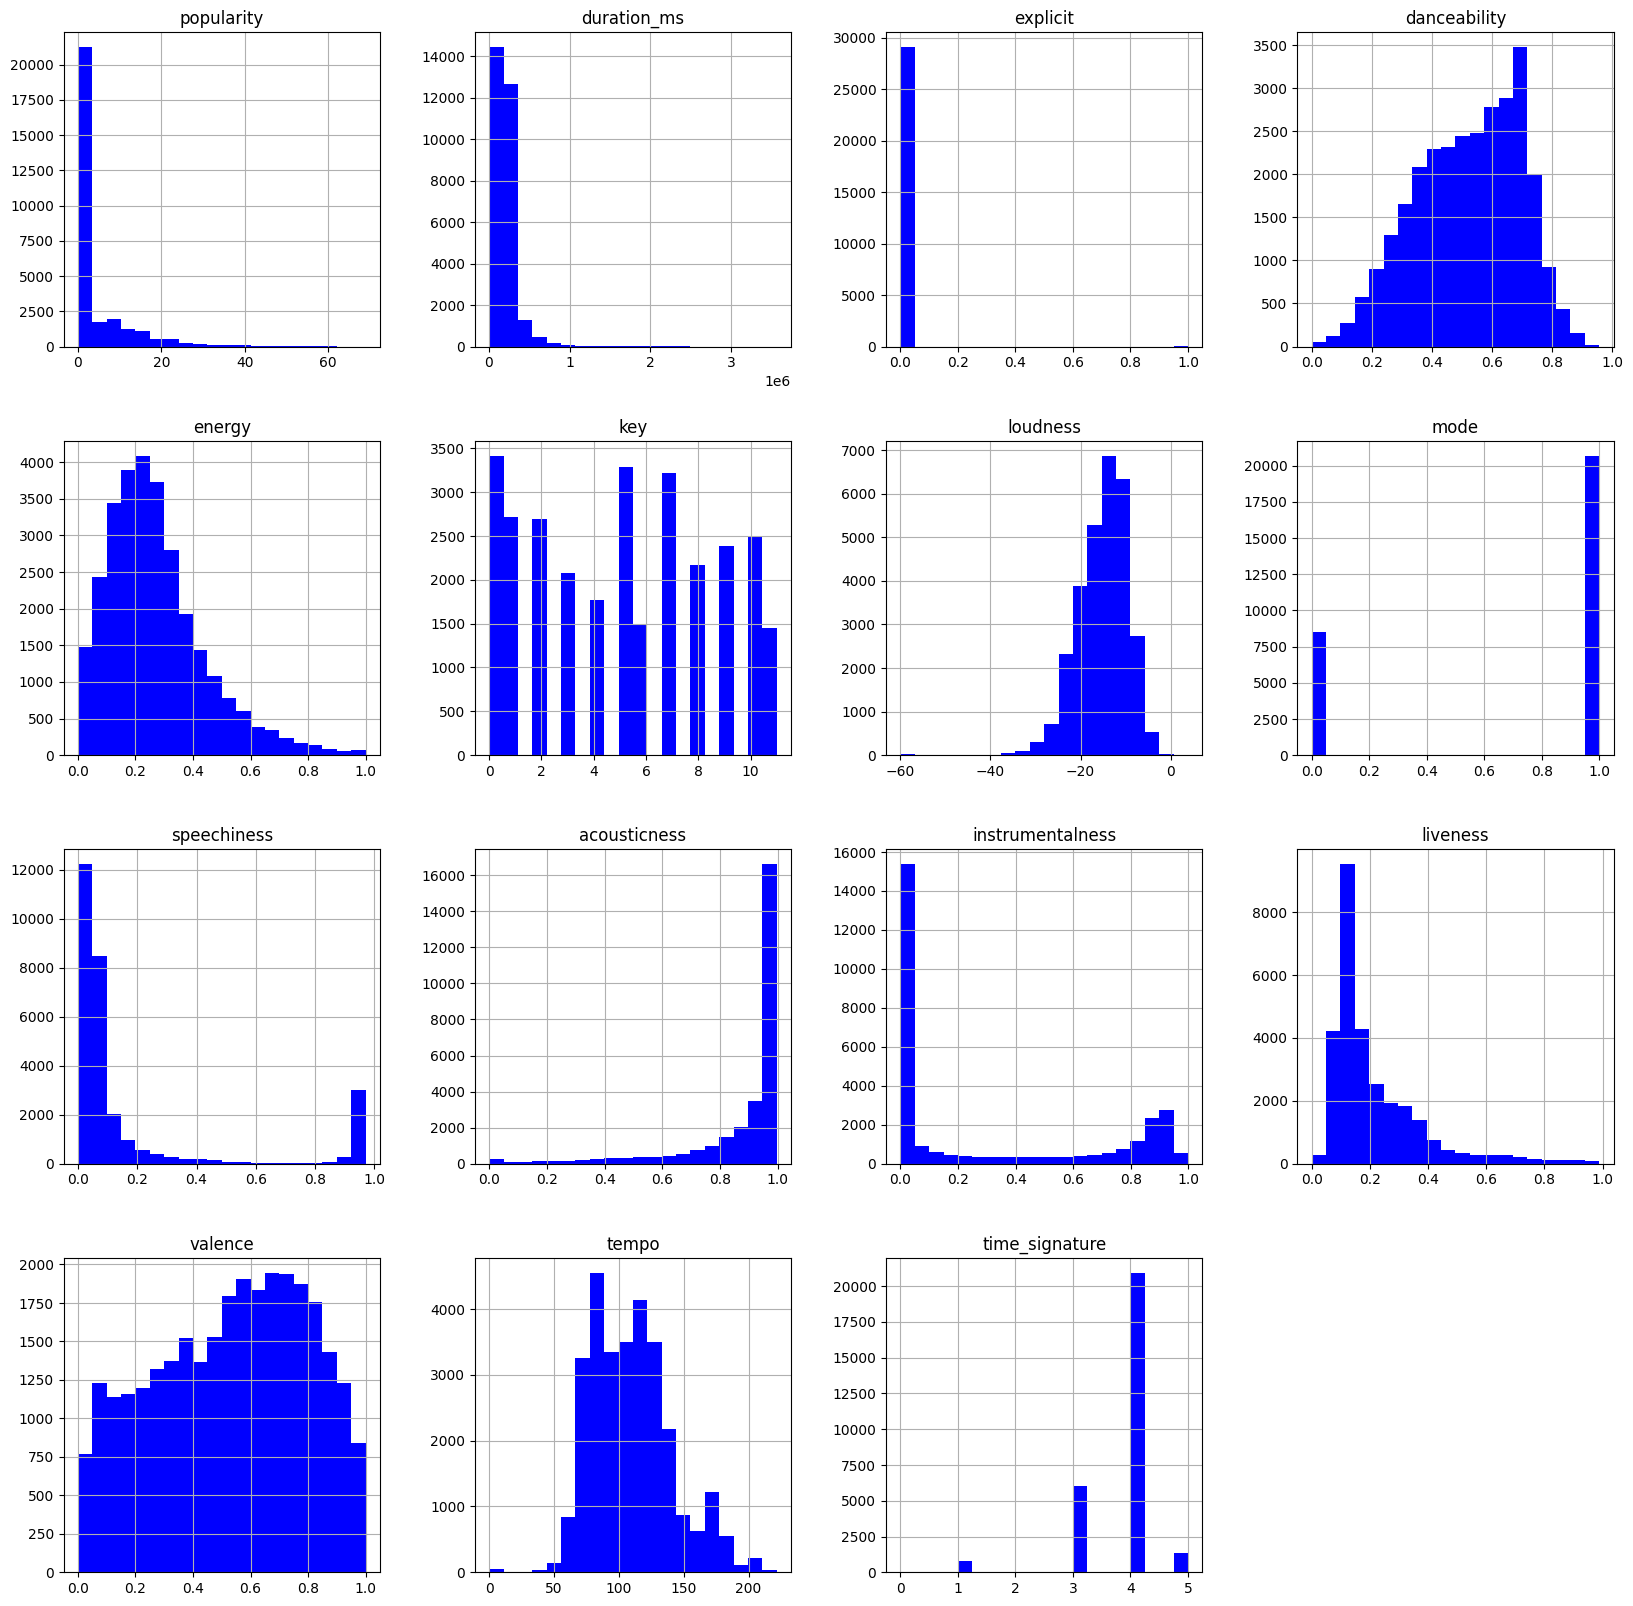

In [10]:
df.hist(bins=20,color = "blue",figsize = (20,20))
plt.show()


# Data Analysis



Data Visualization

In [11]:
categorical_df = df.select_dtypes(include = 'object')

categorical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29169 entries, 0 to 29168
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            29169 non-null  object
 1   name          29169 non-null  object
 2   artists       29169 non-null  object
 3   id_artists    29169 non-null  object
 4   release_date  29169 non-null  object
dtypes: object(5)
memory usage: 1.1+ MB


In [12]:
for col in categorical_df.columns:
    print(f'{col}: {categorical_df[col].nunique()}')
    print('\n')

id: 29169


name: 25995


artists: 6138


id_artists: 6138


release_date: 781




/tmp/ipython-input-2462459390.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_artists.values, y=top_artists.index, palette='rocket_r', edgecolor='black')


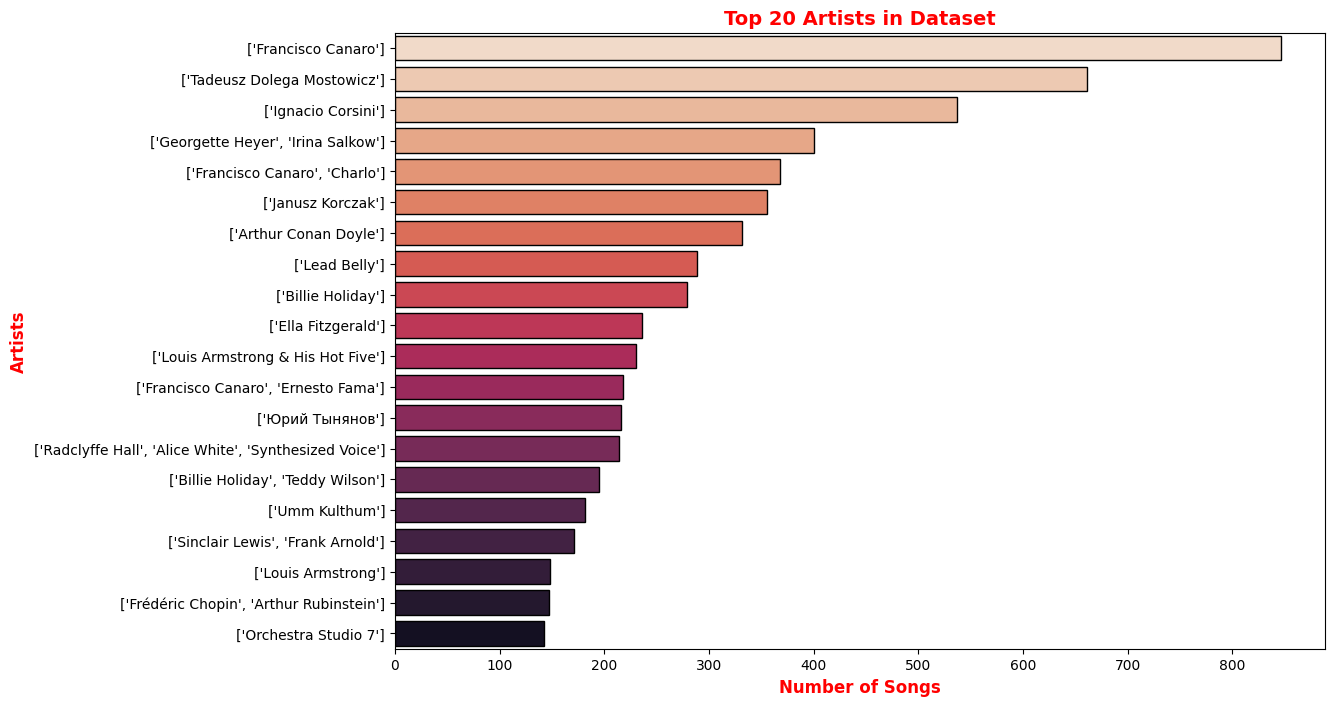

In [13]:
# Get top 20 artists by number of songs
top_artists = df['artists'].value_counts().head(20)

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(x=top_artists.values, y=top_artists.index, palette='rocket_r', edgecolor='black')
plt.xlabel('Number of Songs', fontsize=12, weight='bold', color='r')
plt.ylabel('Artists', fontsize=12, weight='bold', color='r')
plt.title('Top 20 Artists in Dataset', fontsize=14, weight='bold', color='r')
plt.show()

In [14]:
import datetime

In [15]:
df.release_date = pd.to_datetime(df.release_date, errors='coerce', format='mixed')

In [16]:
df.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3.0
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1.0
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5.0
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3.0
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922-01-01,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4.0


Find the number of songs per year

In [17]:
df["year"] = df["release_date"].dt.year

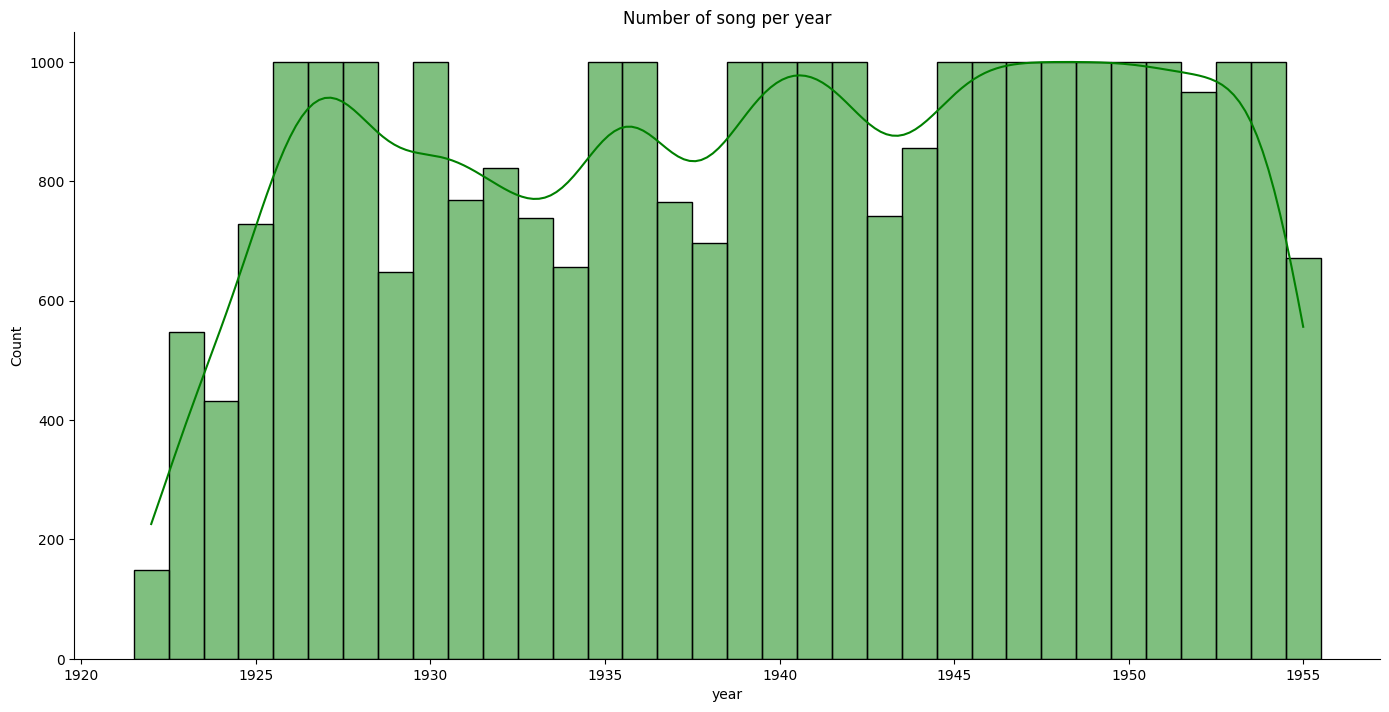

In [18]:
sns.displot(df["year"], discrete = True, aspect = 2, height = 7, kind = "hist", kde = True, color = 'green').set(title="Number of song per year")
plt.show()

Find the most popular songs on Spotify

In [23]:
most_popularity = df.query('popularity > 50', inplace = False).sort_values('popularity', ascending = False)

most_popularity.head(10)

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,year
22549,5NGtFXVpXSvwunEIGeviY3,Gymnopédie No. 1,69,205867,0,"['Erik Satie', 'Philippe Entremont']","['459INk8vcC0ebEef82WjIK', '4x2fCu6MNErew0pb64...",1949-01-01,0.469,0.0128,...,-36.856,1,0.1190,0.994,0.937000,0.0941,0.3540,72.765,3.0,1949
27499,648TTtYB0bH0P8Hfy0FmkL,Unforgettable,68,191973,0,['Nat King Cole'],['7v4imS0moSyGdXyLgVTIV7'],1954-01-01,0.349,0.1820,...,-13.507,1,0.0310,0.920,0.015200,0.1430,0.1780,136.094,3.0,1954
8095,1LGqJ3nvxpVXDWpEzq4DJD,All of Me,65,181440,0,['Billie Holiday'],['1YzCsTRb22dQkh9lghPIrp'],1933-01-01,0.504,0.0644,...,-14.754,0,0.0408,0.972,0.000004,0.1740,0.4030,106.994,5.0,1933
28498,6crfO56bDm0RjpctUuGs5X,I'm In The Mood For Love,65,149827,0,['Julie London'],['3qUMmh5biaB5hqpF4LqS3m'],1955-12-01,0.580,0.0545,...,-14.594,0,0.0473,0.963,0.000265,0.0967,0.1770,123.341,4.0,1955
28499,1uRKT2LRANv4baowBWHfDS,(We're Gonna) Rock Around The Clock,64,129893,0,['Bill Haley & His Comets'],['3MFp4cYuYtTZe3d3xkLLbr'],1955-12-19,0.811,0.8590,...,-6.317,1,0.1680,0.205,0.000004,0.0761,0.7840,90.686,4.0,1955
28500,7f6AAixCrVar1ZY7RPHDfM,Cry Me A River,63,178573,0,['Julie London'],['3qUMmh5biaB5hqpF4LqS3m'],1955-12-01,0.496,0.0688,...,-14.927,0,0.0545,0.964,0.002290,0.1120,0.1610,119.898,4.0,1955
21549,6yhLR2sVn1IfsScVrR4ocr,"Whatever Will Be, Will Be (Que Sera, Sera) (wi...",62,123360,0,"['Doris Day', 'Frank DeVol & His Orchestra']","['3ESG6pj6a0LvUKklENalT6', '2N0Yx2ISFxGV0yt7xf...",1948-01-01,0.416,0.3410,...,-10.749,1,0.0391,0.864,0.000000,0.7240,0.7760,177.229,4.0,1948
26499,6kf7ZCJjEbjZXikivKOsvJ,Claire de lune,62,347427,0,"['Claude Debussy', 'Alexis Weissenberg']","['1Uff91EOsvd99rtAupatMP', '2fxWL96h0S44PhEa9e...",1953-01-01,0.365,0.0100,...,-25.268,1,0.0519,0.995,0.924000,0.0584,0.0364,135.048,3.0,1953
18549,0qB213IfGN0JXXm9aRjldF,Again (with The Mellomen),61,167907,0,"['Doris Day', 'The Mellomen']","['3ESG6pj6a0LvUKklENalT6', '548L4DXlt7N14Mhbfd...",1945-01-01,0.495,0.0209,...,-21.329,1,0.0348,0.981,0.000001,0.0753,0.1450,62.588,4.0,1945
28501,1xlyVmdCo5lMRIzuMlAUF7,I'm Glad There Is You,61,147413,0,['Julie London'],['3qUMmh5biaB5hqpF4LqS3m'],1955-12-01,0.492,0.0671,...,-15.671,0,0.0399,0.958,0.000968,0.1090,0.1650,124.908,4.0,1955


In [25]:
lead_songs = most_popularity[['name', 'popularity']].head(20)

lead_songs

,name,popularity
22549,Gymnopédie No. 1,69
27499,Unforgettable,68
8095,All of Me,65
28498,I'm In The Mood For Love,65
28499,(We're Gonna) Rock Around The Clock,64
28500,Cry Me A River,63
21549,"Whatever Will Be, Will Be (Que Sera, Sera) (wi...",62
26499,Claire de lune,62
18549,Again (with The Mellomen),61
28501,I'm Glad There Is You,61


Find the most danceable songs

In [31]:
most_danceable = df.sort_values(by='danceability',ascending=False).head(10)

most_danceable

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,year
15806,66AB0h3csbgJkQmqPfOuGc,No Cap,0,90702,1,"['ОТВАЛ БАWKN', 'Cartier99']","['0RTxXsM7r9EsJSOTTP84Ae', '0P54zUcSnQgjWwVYTu...",1941-05-05,0.957,0.392,...,-5.501,1,0.1460,0.22500,0.000080,0.0905,0.605,130.050,4.0,1941
9100,3Qd0743VR2NIML4V0T2lm4,Oh Yeah Oh Yeah,0,203333,0,"['Mad Dog', 'Meltdown']","['11bLrAGMCRADXyeRks7OC0', '6HsYKtiUc5S9qD2tnY...",1934-01-01,0.956,0.594,...,-6.066,1,0.0454,0.02170,0.015100,0.0950,0.924,109.037,4.0,1934
23432,0x82spKiZKQBvDb0bpVivm,Okey Johnny,2,141469,0,['Bob Nelson'],['29wPHLai6m9NfIi9P7yA1F'],1949-10-30,0.946,0.224,...,-14.636,1,0.1460,0.99200,0.140000,0.1620,0.867,118.837,4.0,1949
1159,1Znnilxi9JGrqarvVHAgy3,Breakaway,5,169560,0,['The Travelers'],['54BhXMH6I0V0tfzwwH2nPj'],1925-01-01,0.934,0.609,...,-9.479,1,0.0636,0.95900,0.889000,0.0966,0.855,107.321,4.0,1925
14468,1CzvMvRvGlrNFyCm6Tsb1R,Pippo Non Lo Sa - Extended Mix,0,420049,0,"['Laisla', 'Trio Lescano']","['3YYJlnrtKbykNmQ5U2aABj', '67ADMLf2wkZTfocddP...",1940-01-01,0.929,0.739,...,-5.327,1,0.1330,0.00152,0.136000,0.0644,0.325,125.009,4.0,1940
10299,4Y7yZIB7SsMbkCjXsG7Ucq,Cuchareta,0,167800,0,['Avelino Muñoz'],['12DgO1yxAij1kAaIZRLLs0'],1935-01-01,0.921,0.749,...,-11.180,1,0.1830,0.59200,0.046400,0.3230,0.963,118.057,4.0,1935
3034,1BLPoS2joljvu07Bz26oWW,La Bataclana - Instrumental (Remasterizado),0,157493,0,['Francisco Canaro'],['2maQMqxNnlRrBrS1oAsrX9'],1927-08-16,0.919,0.207,...,-16.224,0,0.2720,0.99500,0.843000,0.1090,0.894,119.512,4.0,1927
28618,4aE7oc6DyiMvNWutwblivY,Jane Kahan Mera Jigar Gaya Ji,29,218373,0,"['Geeta Dutt', 'Mohammed Rafi']","['0QsbYX8XslSSUcztc6u4pO', '0gXDpqwYNDODn7fB0R...",1955-12-01,0.917,0.532,...,-5.145,1,0.0590,0.87700,0.000000,0.0751,0.977,121.317,4.0,1955
2986,0lRkQU9EKgH2zqDywuSuSi,Trago Amargo - Instrumental (Remasterizado),0,172333,0,['Francisco Canaro'],['2maQMqxNnlRrBrS1oAsrX9'],1927-08-23,0.916,0.306,...,-10.526,0,0.1260,0.98700,0.265000,0.1180,0.928,116.380,4.0,1927
20521,3wIxTyp6zLGn61A6rHvIUN,Dupatta Mora Aaj Hi Rang Dijo,0,191048,0,['S.N.Tripathi'],['0yZ4ZjHAaeahKVn5lWn1wD'],1946-12-31,0.916,0.315,...,-7.308,1,0.2200,0.98900,0.000001,0.1900,0.728,120.118,4.0,1946


Find songs with the most energy

In [32]:
most_energy = df.sort_values(by='energy',ascending=False).head(10)

most_energy

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,year
12336,3RFogvPJRYXVCv9qlotTKK,Applause; Transition Back to Goodman Orchestra...,6,41093,0,['Benny Goodman'],['1pBuKaLHJlIlqYxQQaflve'],1938-01-01,0.302,1.000,...,-22.887,0,0.0635,0.835,0.693,0.951,0.00001,98.839,4.0,1938
26443,0qaTovCpujD0RTdPajDknp,"60' Water, Pac.",0,28347,0,['Unspecified'],['1DAxGq6wVo10yU3vjZV9kM'],1952-01-01,0.582,1.000,...,-8.982,1,0.1470,0.673,0.846,0.239,0.02100,99.634,4.0,1952
12595,4MeVaz1Ki3nEofHif86bAd,Applause as Lionel Hampton Enters - Live,0,26640,0,['Benny Goodman'],['1pBuKaLHJlIlqYxQQaflve'],1938-01-01,0.305,1.000,...,-20.422,0,0.2370,0.315,0.717,0.366,0.00001,123.257,4.0,1938
12240,6xYZrESY382GI6CcleGtps,I'm Bubbling Over (Reprise),0,79681,0,"['Condos Brothers', 'Ben Bernie & His Orchestra']","['6TcMKIvyZqLZOA2P0GrIaw', '5HOzq7et69WsiVJbZD...",1937-08-03,0.627,1.000,...,-9.253,1,0.2040,0.600,0.934,0.706,0.02780,116.150,4.0,1937
18347,6CMBpPcW5HH8VM5mpwCzRS,Suno Suno Tumhen Sunaye,0,163154,0,['K Dutta'],['2sOPDx3ICYZJspPHFZNysM'],1944-12-31,0.000,1.000,...,-4.363,1,0.0000,0.202,0.999,0.647,0.00000,0.000,0.0,1944
12341,4jmpeJO5XS9MukFzhARGrS,Applause; Benny Goodman's 'No Encore' Announce...,7,73933,0,['Benny Goodman'],['1pBuKaLHJlIlqYxQQaflve'],1938-01-01,0.244,1.000,...,-19.537,1,0.0972,0.880,0.889,0.403,0.00001,95.123,4.0,1938
2353,2cODstPu4nOAIFfwnvNEwx,Moi J'fais Mes Coups En Dessous,0,190493,0,['Maurice Chevalier'],['3QXjI80udwDSEfxK5BjUXc'],1926-01-01,0.166,1.000,...,-4.373,0,0.0643,0.131,0.311,0.333,0.00001,116.707,3.0,1926
12697,6DQ5ZjqGTNCyUWQ3hjOB6r,Applause; Martha Tilton Returns to Stage - Live,0,21467,0,['Benny Goodman'],['1pBuKaLHJlIlqYxQQaflve'],1938-01-01,0.277,1.000,...,-17.484,1,0.0676,0.785,0.933,0.952,0.00001,118.466,1.0,1938
12535,30sixQcUtHCZg3wvFLUDU8,Applause; Transition Back to Goodman Orchestra...,0,21733,0,['Benny Goodman'],['1pBuKaLHJlIlqYxQQaflve'],1938-01-01,0.268,0.999,...,-17.562,1,0.0442,0.567,0.458,0.953,0.00448,77.508,3.0,1938
12488,2FnSJPoTbC0wi1oYF8GhNx,Applause for Second Encore - Live,0,21040,0,['Benny Goodman'],['1pBuKaLHJlIlqYxQQaflve'],1938-01-01,0.208,0.999,...,-18.687,0,0.0635,0.895,0.858,0.953,0.00213,93.606,4.0,1938


Find songs more likely to create positive feelings



>A value between 0.0 and 1.0 that describes the melodic upbeatness of a track. High-valence songs sound more positive (e.g., pleasant, cheery, euphoric), whereas low-valence tracks sound more negative (e.g. sad, depressed, angry).



In [33]:
most_valence = df.sort_values(by='valence',ascending=False).head(10)

most_valence

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,year
11955,53nhbx7yp4TJEpmMBCLWPQ,Chatter,0,19200,0,['Raymond Scott'],['31DffUzogcRBJT3Andaqtt'],1937-01-01,0.768,0.3170,...,-12.017,0,0.8640,0.933,0.22400,0.5720,1.000,119.254,4.0,1937
20376,3M3ZdR9CMhHWTfQxfKuAnP,"Violin Partita No. 3 in E Major, BWV 1006: VI....",1,117653,0,"['Johann Sebastian Bach', 'Jascha Heifetz']","['5aIqB5nVVvmFsvSdExz408', '7yaBUcdjmqPP2vIv6F...",1946-01-01,0.571,0.2210,...,-14.965,0,0.0918,0.986,0.06560,0.6630,0.995,114.078,3.0,1946
20388,3OzidubrafPqdgTCS3Jac7,"Violin Partita No. 3 in E Major, BWV 1006: III...",1,164933,0,"['Johann Sebastian Bach', 'Jascha Heifetz']","['5aIqB5nVVvmFsvSdExz408', '7yaBUcdjmqPP2vIv6F...",1946-01-01,0.605,0.0708,...,-14.652,1,0.2070,0.985,0.22600,0.1590,0.986,83.128,4.0,1946
13979,2VsI33ZjR0UjL1HznDtm2q,At the Bazaar,14,65067,0,['Max Steiner'],['3llWEEOW2xNfiKsXXWjrwl'],1940-01-17,0.811,0.4480,...,-12.139,1,0.0533,0.723,0.98500,0.0521,0.986,119.793,4.0,1940
6305,2h9BY0DF5MgrCMHzZngFAw,Tin omorfia sou exases,0,30000,0,"['Stratos Pagioumtzis', 'Stellakis Perpiniadis']","['7N0fh2csz0eFkrE01LF1m3', '0huMeTK6uba9aYAE69...",1930-01-01,0.578,0.5220,...,-13.152,1,0.0369,0.995,0.91000,0.5580,0.986,203.903,4.0,1930
5958,1Od9dEEcvuwoEO3i492zCw,Τσεσμές,0,171373,0,['Ορχήστρα Γεωργίου Μέγα'],['20XmpJ2ZeOmjB1e7np2EL8'],1930-01-01,0.601,0.5950,...,-8.309,1,0.1130,0.922,0.90400,0.1230,0.986,99.297,4.0,1930
23134,05rcBgPEX4kK71UrlYhoiS,Yellow Gal,1,40720,0,['Lead Belly'],['3Ovf2lytXSXWFM2cwsJACC'],1949-01-01,0.602,0.7020,...,-6.858,1,0.0417,0.927,0.00181,0.3400,0.984,110.780,4.0,1949
21938,0zZfsoYKedT4GBKcmujjZo,Στα Γιάννενα στα Δέρβαινα,0,95299,0,['Μιχάλης Καλέργης'],['0jLOHiwAudDUd7qscjH1Cb'],1948-01-01,0.722,0.4580,...,-8.838,1,0.0581,0.966,0.00138,0.1070,0.984,86.824,4.0,1948
13031,3qIjAtTwBquTsqtOs0dTo0,Follow the Yellow Brick Road / You're Off to S...,17,51707,0,['MGM Studio Orchestra'],['2EjrRJZBrUhYqcgmYF69N1'],1939-08-25,0.763,0.5150,...,-17.044,1,0.0598,0.635,0.03340,0.2250,0.983,135.558,4.0,1939
26003,5GJDWCxYwnpBFP6kxxCLtp,Dear Old Dixie (with The Foggy Mountain Boys) ...,6,150440,0,"['Lester Flatt', 'Earl Scruggs', 'The Foggy Mo...","['4UEb5ZsSyDWMAiBuOeKA6W', '4NEA48c6ajydrRzCby...",1952-01-01,0.357,0.7300,...,-8.988,1,0.0345,0.244,0.85000,0.1060,0.982,159.679,4.0,1952


# EDA


## Univariate Analysis

In [34]:
num_df = df.select_dtypes(include = 'number')

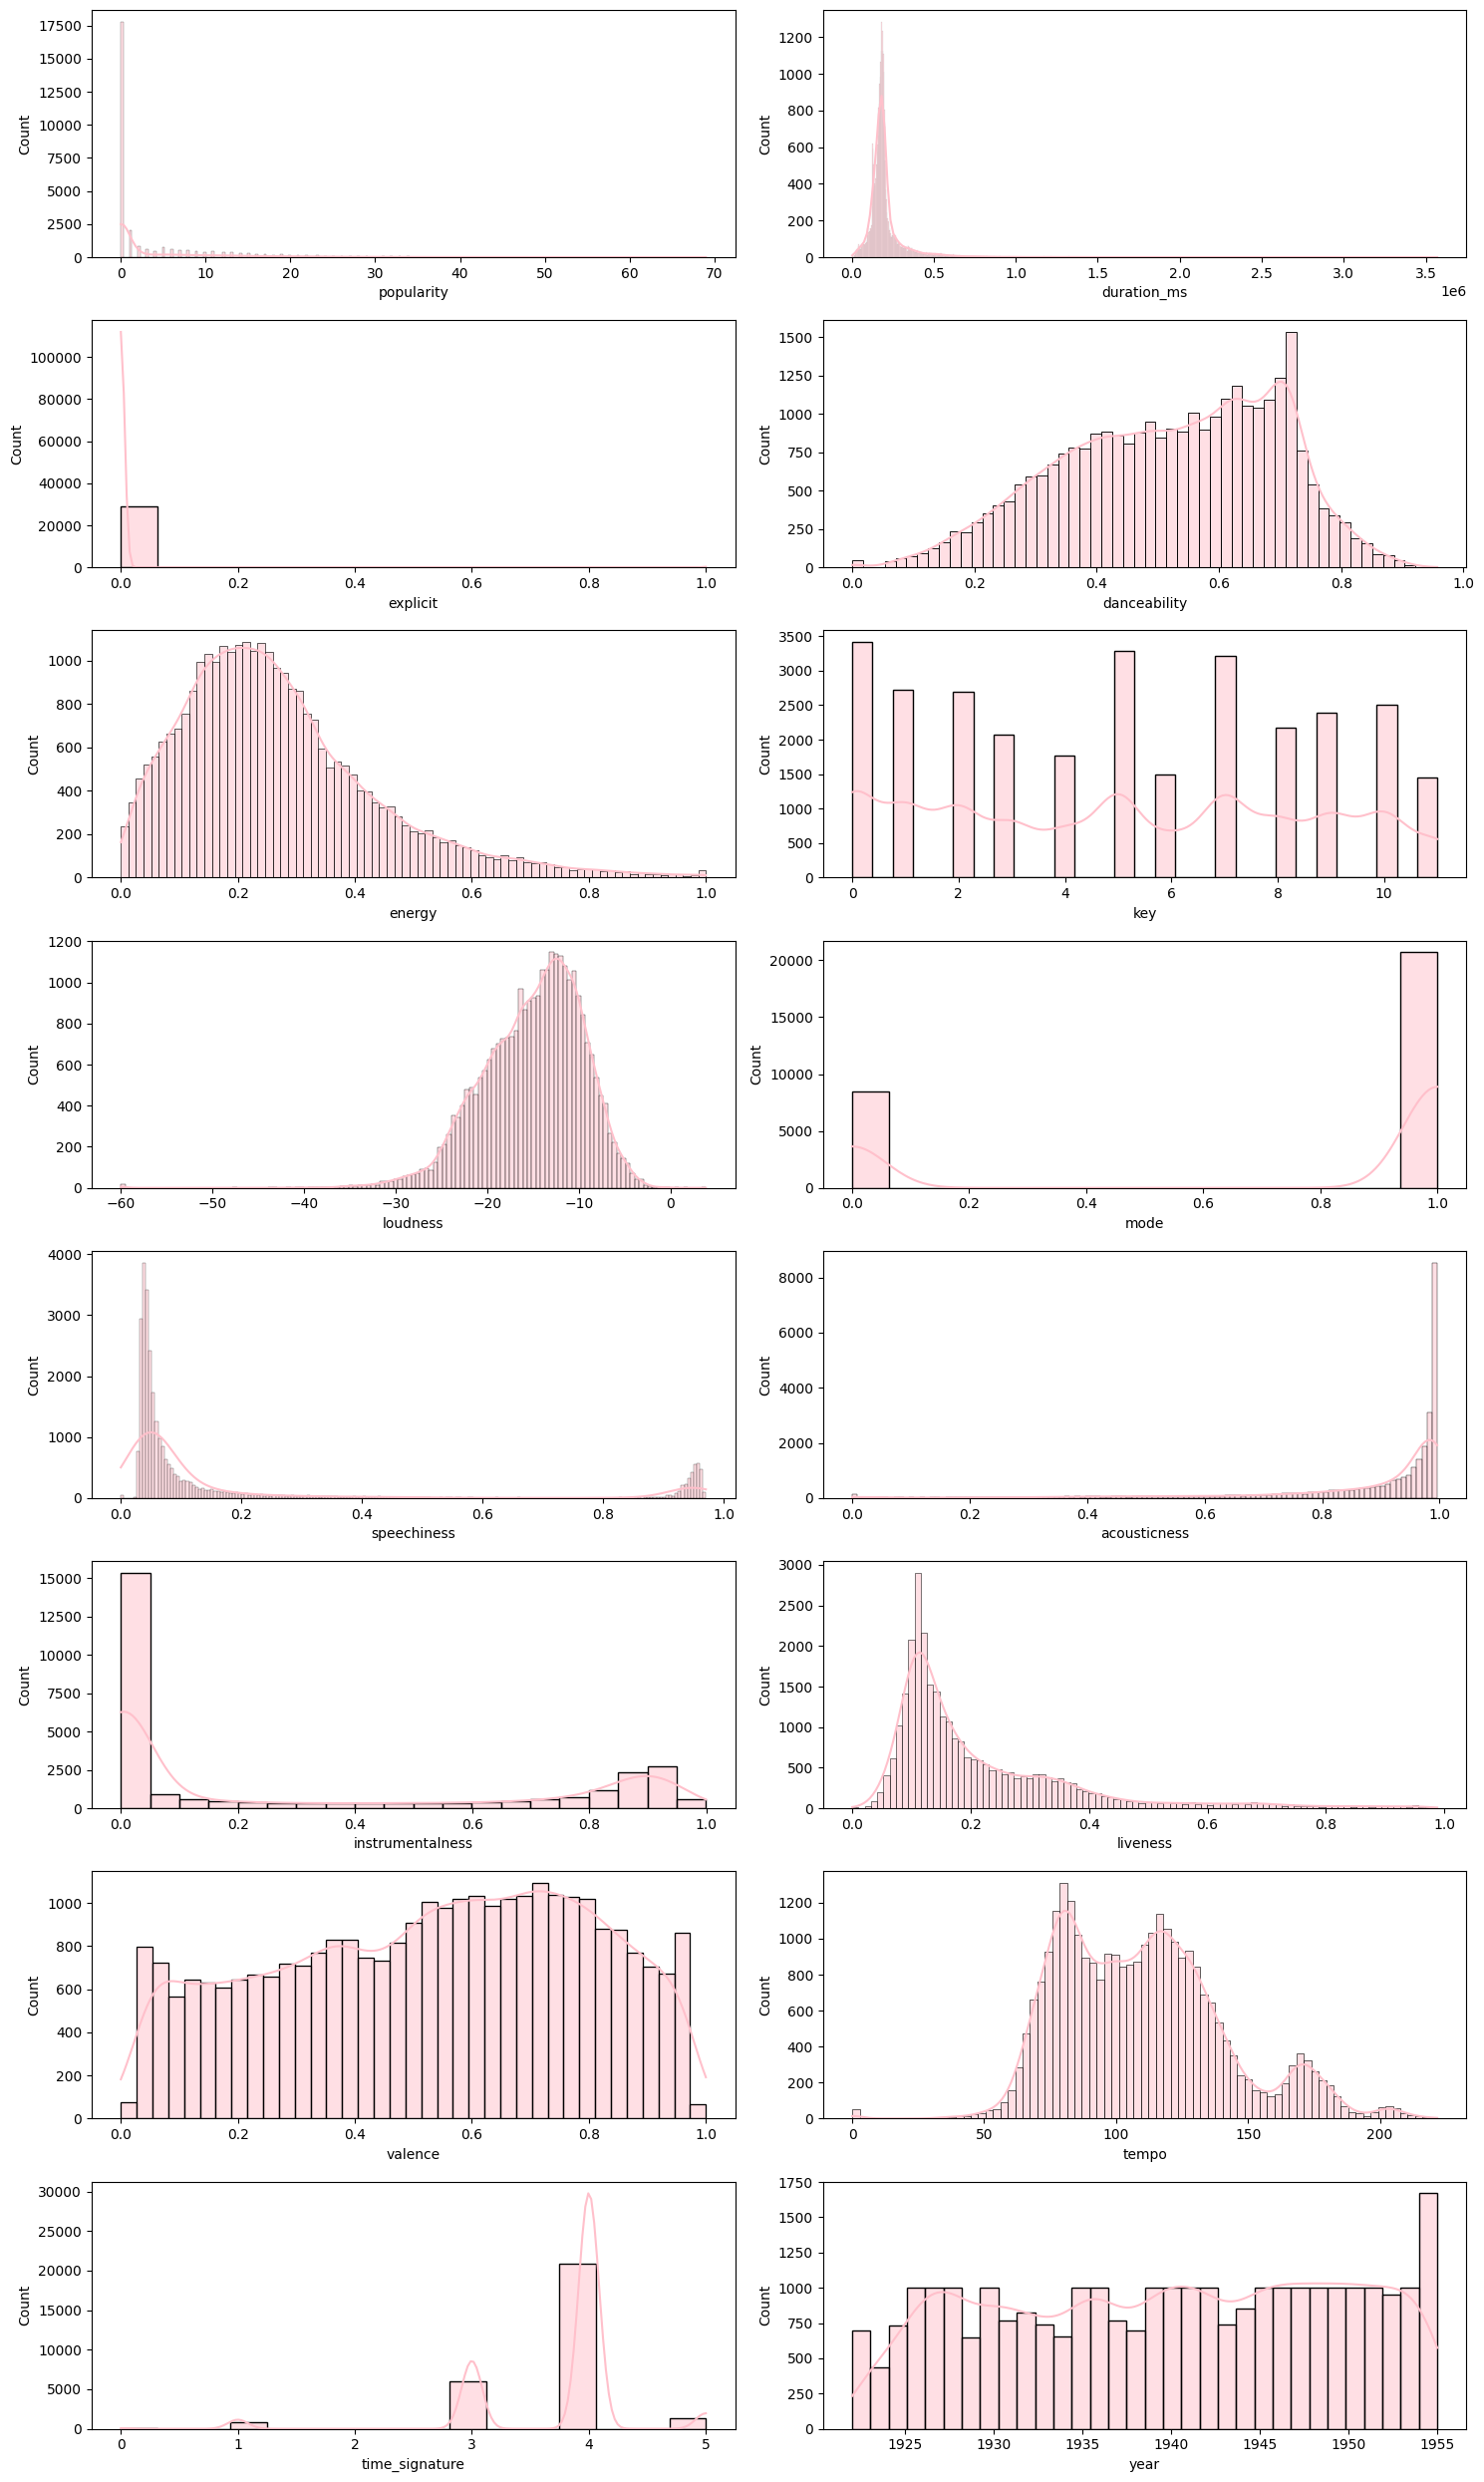

In [37]:
# plt.style.use('seaborn')

names = list(num_df.columns)

plot_per_row = 2

f, axes = plt.subplots(round(len(names)/plot_per_row), plot_per_row, figsize = (15, 25))

y = 0;

for name in names:
    i, j = divmod(y, plot_per_row)
    sns.histplot(x=df[name], kde = True, ax=axes[i, j], color = 'pink')
    y = y + 1

plt.tight_layout()
plt.show()





1.   We can see that popularity, duration, explicit, speechiness, Instrumentalness, liveness are skewed right.
2. loudness, mode, time_signature are skewed left.
3. Only danceability, energy, valence, tempo have normal distribution.
4. Before we can use the machine learning models, we must transform the left and right skewed features have more symmetrical and bell-shaped distributions.





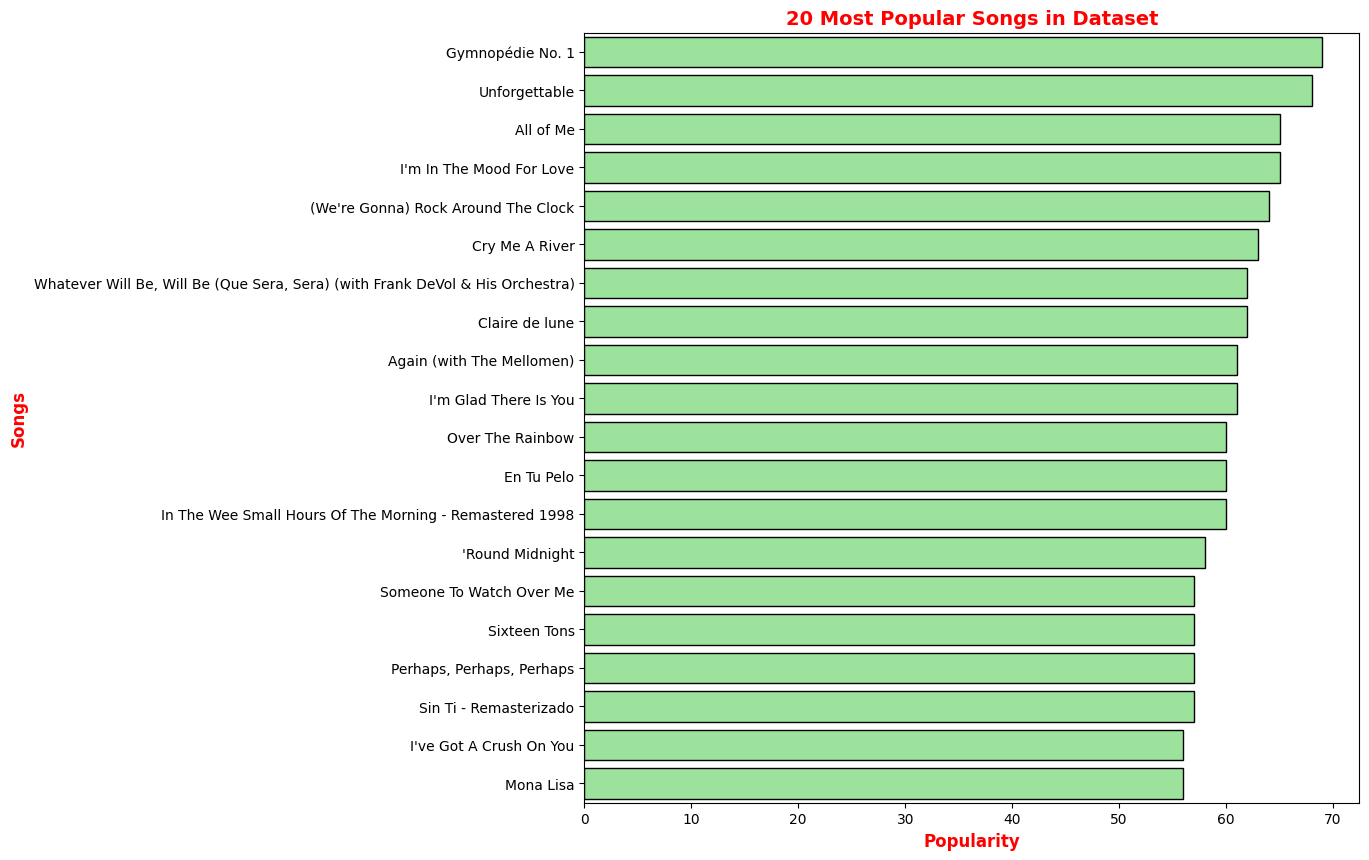

In [26]:
fig, ax = plt.subplots(figsize = (10, 10))

ax = sns.barplot(x = lead_songs.popularity, y = lead_songs.name, color = 'lightgreen', orient = 'h', edgecolor = 'black', ax = ax)

ax.set_xlabel('Popularity', c ='red', fontsize = 12, weight = 'bold')
ax.set_ylabel('Songs', c = 'red', fontsize = 12, weight = 'bold')
ax.set_title('20 Most Popular Songs in Dataset', c = 'red', fontsize = 14, weight = 'bold')

plt.show()

In [28]:
num_df = df.select_dtypes(include = 'number')

/tmp/ipython-input-1234499427.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[name], ax=axes[i, j], palette = 'Set3')
/tmp/ipython-input-1234499427.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[name], ax=axes[i, j], palette = 'Set3')
/tmp/ipython-input-1234499427.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[name], ax=axes[i, j], palette = 'Set3')
/tmp/ipython-input-1234499427.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variab

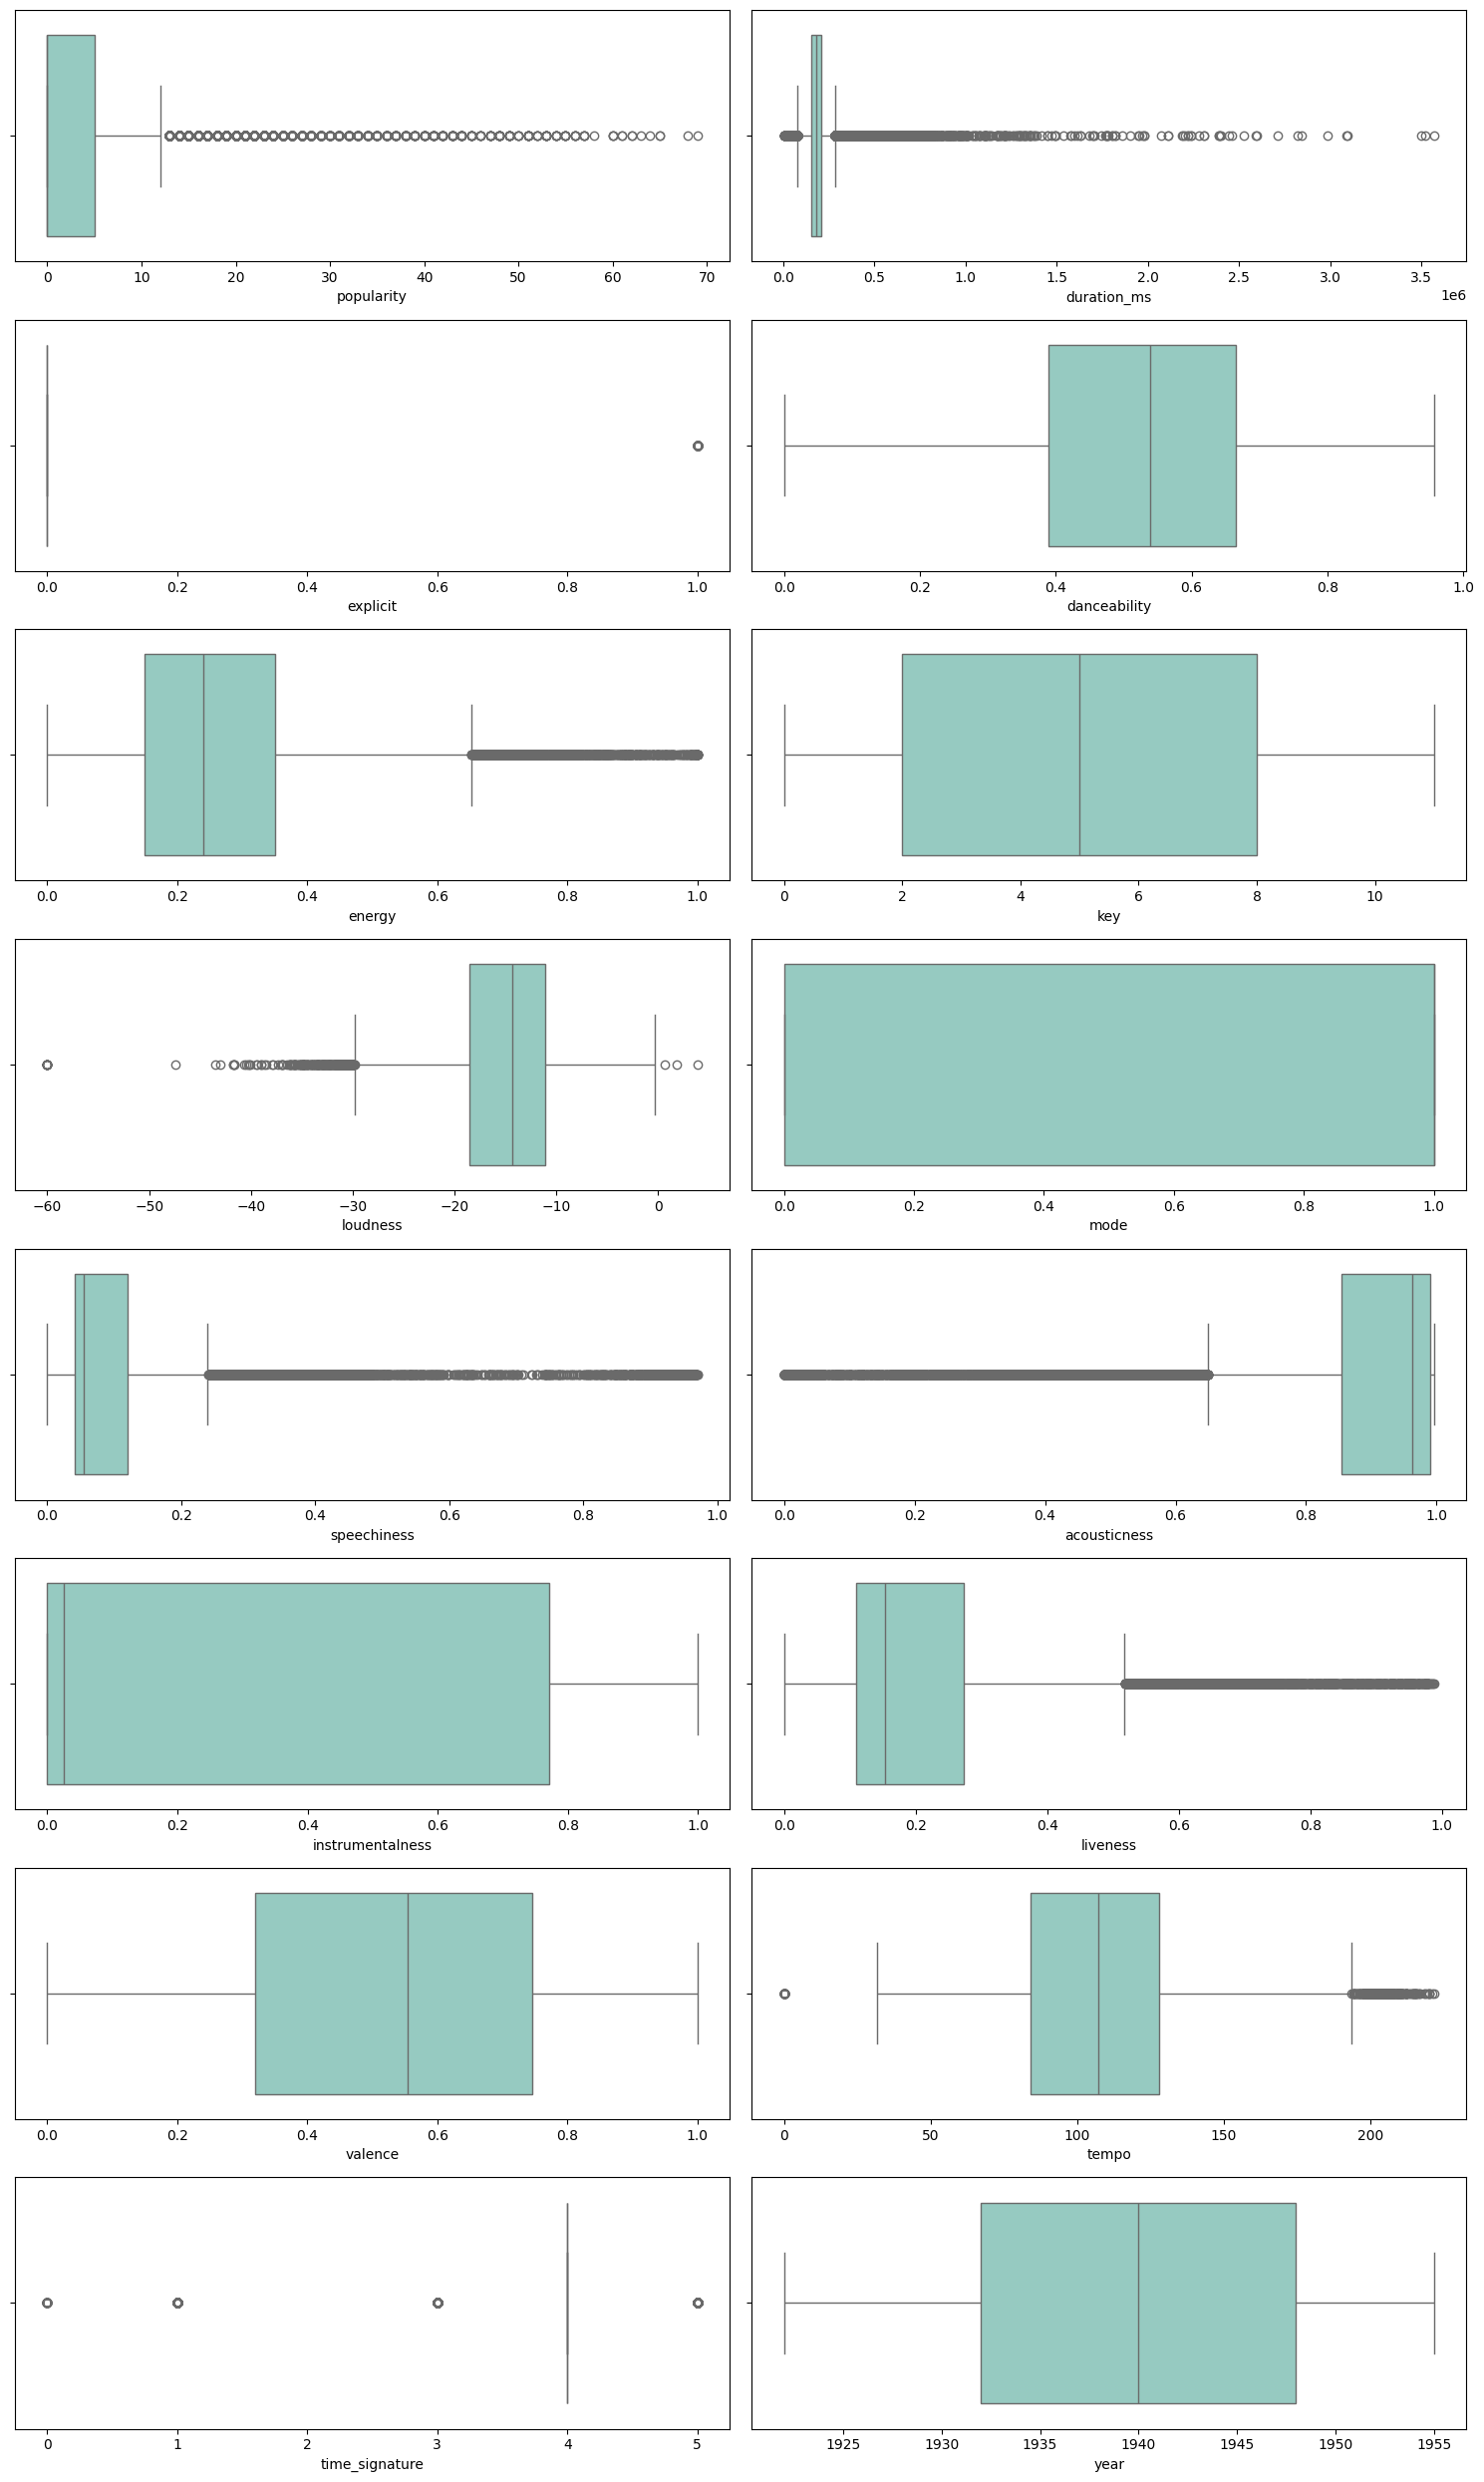

In [38]:

names = list(num_df.columns)

plot_per_row = 2

f, axes = plt.subplots(round(len(names)/plot_per_row), plot_per_row, figsize = (15, 25))

y = 0;

for name in names:
    i, j = divmod(y, plot_per_row)
    sns.boxplot(x=df[name], ax=axes[i, j], palette = 'Set3')
    y = y + 1

plt.tight_layout()
plt.show()

Outliers


1.   From the boxplots of variables, we can see that there are several features that have a lot of outliers. They are duration_ms, loudness, speechiness, instrumentalness, liveness and tempo.
2.   We can deal with them by using IQR Ranges to trim outliers.
3. Or we can use Robust Scaler to deal with them.



## Bivariate Analysis

Linear Correlation

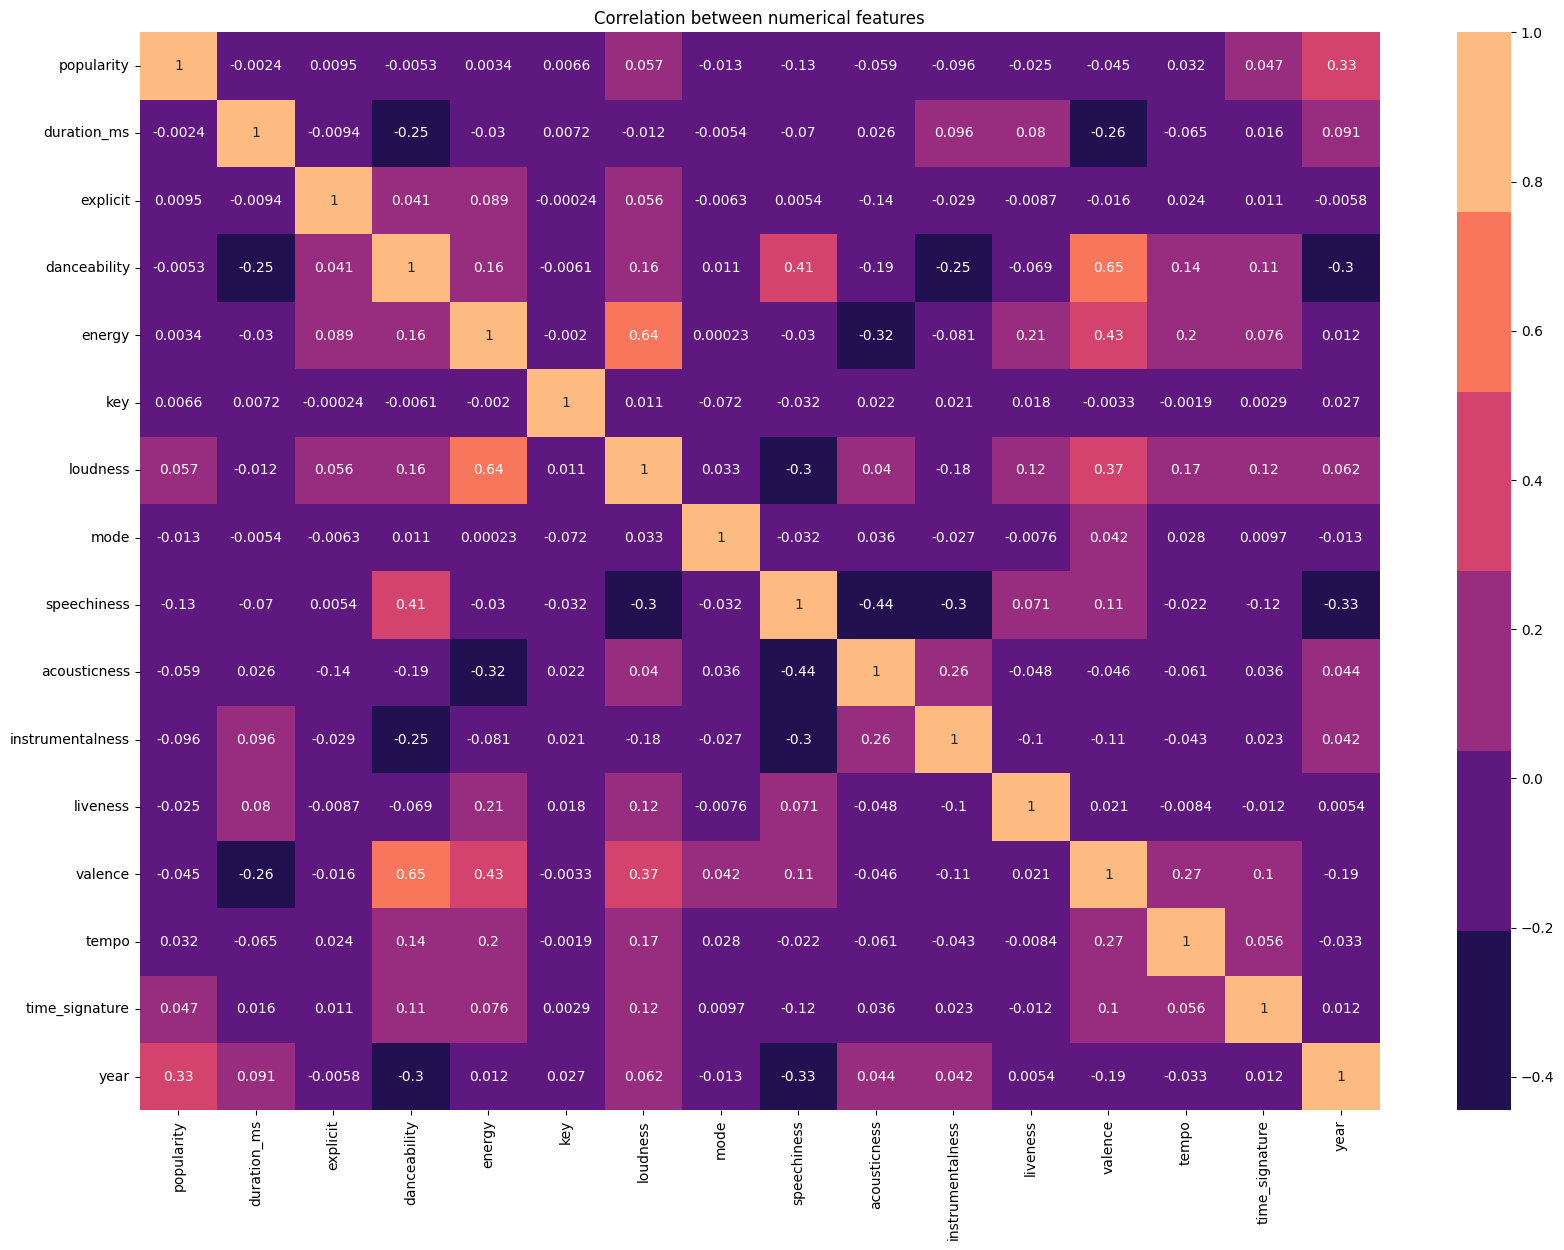

In [40]:
plt.figure(figsize = (20, 14))

corr_matrix = df.corr(numeric_only=True)
cmap = sns.color_palette('magma')
sns.heatmap(corr_matrix, annot = True, cmap = cmap)
plt.title('Correlation between numerical features')
plt.show()

In [41]:
corr_matrix["popularity"].sort_values(ascending=False)

,popularity
popularity,1.000000
year,0.334666
loudness,0.057008
time_signature,0.047477
tempo,0.031643
explicit,0.009490
key,0.006641
energy,0.003390
duration_ms,-0.002432
danceability,-0.005252


From the correlation matrix, we can see that:

* Energy and loudness have a high positive correlation with a score of 0.64.
* The rest variables have acceptable correlation and we can use them to train the machine learning models.

# Feature Selection

In [51]:
drop_cols = ['id', 'name', 'artists', 'id_artists', 'release_date']
df = df.drop(columns=drop_cols)


In [52]:
# Encode categorical columns
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

In [53]:
# Check correlations
corr = df.corr()['popularity'].abs().sort_values(ascending=False)
selected_features = corr[corr > 0.05].index.tolist()
selected_features.remove('popularity')

In [54]:
X = df[selected_features]
y = df['popularity']

In [55]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Scaling

In [56]:

# Scale features for Linear, Ridge, Lasso
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Training

## Linear Regression

In [57]:
results = []

In [58]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)
results.append(["Linear Regression",
                np.sqrt(mean_squared_error(y_test, y_pred_lr)),
                r2_score(y_test, y_pred_lr)])

## Ridge Regression with tuning

In [60]:
from sklearn.model_selection import  GridSearchCV

In [61]:
ridge_params = {'alpha': [0.1, 1, 10, 50, 100]}
ridge = GridSearchCV(Ridge(), ridge_params, cv=5)
ridge.fit(X_train_scaled, y_train)
y_pred_ridge = ridge.predict(X_test_scaled)
results.append(["Ridge Regression",
                np.sqrt(mean_squared_error(y_test, y_pred_ridge)),
                r2_score(y_test, y_pred_ridge)])


##  Lasso Regression with tuning

In [62]:
lasso_params = {'alpha': [0.001, 0.01, 0.1, 1, 10]}
lasso = GridSearchCV(Lasso(max_iter=5000), lasso_params, cv=5)
lasso.fit(X_train_scaled, y_train)
y_pred_lasso = lasso.predict(X_test_scaled)
results.append(["Lasso Regression",
                np.sqrt(mean_squared_error(y_test, y_pred_lasso)),
                r2_score(y_test, y_pred_lasso)])

## Random Forest with tuning

In [63]:
rf_params = {'n_estimators': [100, 200],
             'max_depth': [None, 10, 20],
             'min_samples_split': [2, 5]}
rf = GridSearchCV(RandomForestRegressor(random_state=42), rf_params, cv=3)
rf.fit(X_train, y_train)  # No scaling for RF
y_pred_rf = rf.predict(X_test)
results.append(["Random Forest",
                np.sqrt(mean_squared_error(y_test, y_pred_rf)),
                r2_score(y_test, y_pred_rf)])

print results

In [64]:
results_df = pd.DataFrame(results, columns=["Model", "RMSE", "R² Score"])
print(results_df)

               Model      RMSE  R² Score
0  Linear Regression  7.342825  0.130200
1   Ridge Regression  7.342874  0.130188
2   Lasso Regression  7.342822  0.130201
3      Random Forest  6.235731  0.372711


/tmp/ipython-input-2334969608.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="RMSE", data=results_df, ax=axes[0], palette="viridis")
/tmp/ipython-input-2334969608.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="R² Score", data=results_df, ax=axes[1], palette="magma")


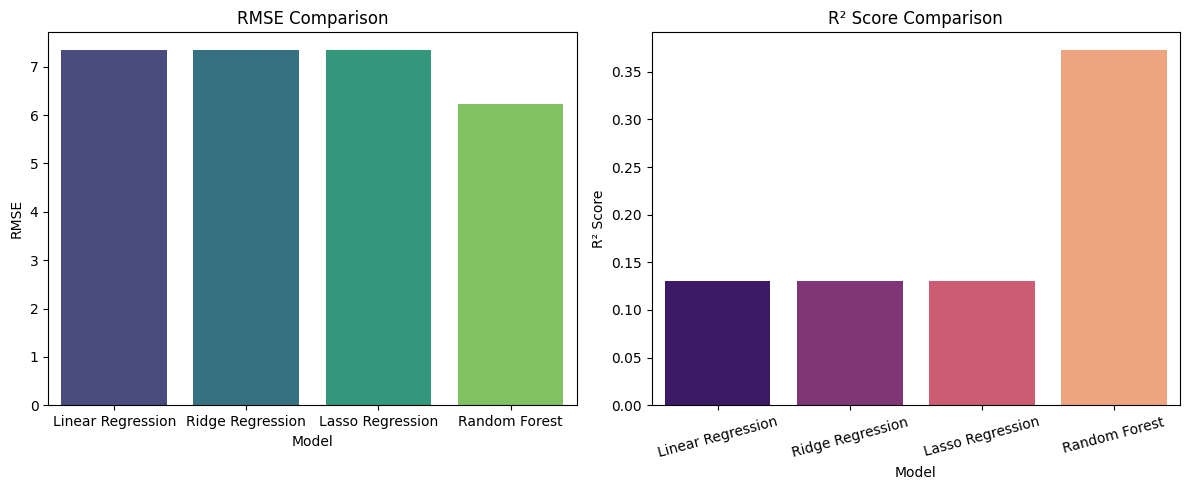

In [66]:
fig, axes = plt.subplots(1, 2, figsize=(12,5))
# RMSE Plot
sns.barplot(x="Model", y="RMSE", data=results_df, ax=axes[0], palette="viridis")
axes[0].set_title("RMSE Comparison")
axes[0].set_ylabel("RMSE")

# R² Score Plot
sns.barplot(x="Model", y="R² Score", data=results_df, ax=axes[1], palette="magma")
axes[1].set_title("R² Score Comparison")
axes[1].set_ylabel("R² Score")

plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

## Feature Importance using Random Forest

/tmp/ipython-input-3594038795.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='coolwarm')


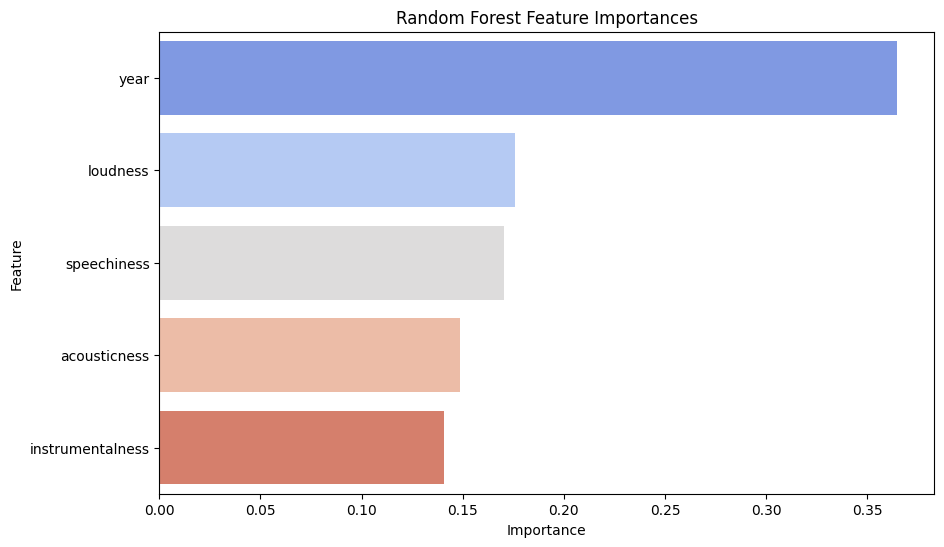

In [67]:
importances = rf.best_estimator_.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='coolwarm')
plt.title("Random Forest Feature Importances")
plt.show()